## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_columns',None)

In [3]:
old_flight_df = pd.read_feather('data/flights')
flight_df = pd.read_feather('data/v1_clean_flight')
flight_test_df = pd.read_feather('data/v1_clean_flight_test')
fuel_consumption_df = pd.read_feather('data/v1_clean_fuel_consumption')
passenger_df = pd.read_feather('data/v1_clean_passenger')
weather_flight_df = pd.read_feather('data/flight_weather_100')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [ ]:
old_flight_df[['crs_dep_time','dep_time','dep_delay']]

<AxesSubplot: >

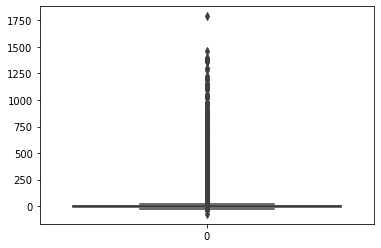

In [516]:
sns.boxplot(old_flight_df['dep_delay'])

(array([  664., 82198.,  8380.,  3172.,  1536.,   917.,   558.,   315.,
          207.,   130.]),
 array([-50., -15.,  20.,  55.,  90., 125., 160., 195., 230., 265., 300.]),
 <BarContainer object of 10 artists>)

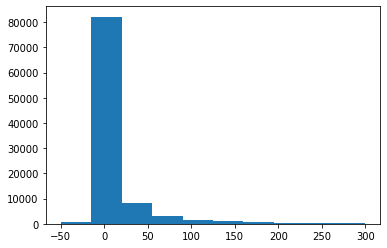

In [517]:
plt.hist(old_flight_df['dep_delay'], range=(-50, 300))
# Plot shows that this is not a normal distribution. 

In [518]:
old_flight_df['dep_delay'].mean()
#mean of dep_delay is not 0

10.503668251839207

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [519]:
## Reasons for the biggest delays is mainly due to the increase in number of passengers. During these months it is considered vacation time which increases the number of flights and delays.
flight_df['month'] = pd.to_datetime(flight_df['fl_date'],yearfirst=True).dt.month

In [521]:
monthly_df = flight_df[['dep_delay','month']]

In [522]:
monthly_df.groupby('month').mean('dep_delay')

,dep_delay
month,
1,10.660047
2,11.076999
3,8.058370
4,9.196395
5,10.830883
6,15.658855
7,13.619549
8,12.924574
9,7.253121


In [523]:
monthly_df.groupby('month').count()

,dep_delay
month,
1,7704
2,7091
3,8309
4,8045
5,8503
6,8492
7,8553
8,8631
9,8170


In [524]:
passenger_df[['passengers','month']].groupby('month').mean(['passengers'])

,passengers
month,
1,1867.196132
2,1792.575632
3,2053.043399
4,2068.993731
5,2235.500805
6,2176.896866
7,2414.770002
8,2107.603117
9,2068.273008


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [8]:
weather_flight_df[weather_flight_df['rain'] != 0].shape # 50/100 days are raining
weather_flight_df[weather_flight_df['snow'] != 0].shape # 7/100 days are snowing

(7, 32)

In [15]:
weather_flight_df[weather_flight_df['sunny(%)'] > 50].shape # 62/100 days are majority sunny 
weather_flight_df[weather_flight_df['cloud(%)'] > 50].shape # 38/100 days are majority cloudy 

(38, 32)

In [19]:
#old_flight_df[(old_flight_df['weather_delay'].notna()) & (old_flight_df['weather_delay']!=0)]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
107,2018-08-01,AA,AA,AA,473,AA,N544UW,473,11057,CLT,"Charlotte, NC",11292,DEN,"Denver, CO",1800,1904.0,64.0,81.0,2025.0,2142.0,6.0,1936,2148.0,132.0,0.0,None,0.0,N,216.0,284.0,197.0,1.0,1337.0,0.0,62.0,68.0,0.0,2.0,None,NaN,NaN,None
316,2019-03-13,AA,AA_CODESHARE,AA,3536,MQ,N272NN,3536,12945,LEX,"Lexington, KY",11298,DFW,"Dallas/Fort Worth, TX",608,649.0,41.0,9.0,658.0,854.0,26.0,741,920.0,99.0,0.0,None,0.0,N,153.0,211.0,176.0,1.0,785.0,0.0,41.0,58.0,0.0,0.0,604.0,21.0,21.0,None
319,2019-05-29,UA,UA,UA,352,UA,N73270,352,12264,IAD,"Washington, DC",10721,BOS,"Boston, MA",2230,2330.0,60.0,11.0,2341.0,47.0,17.0,6,104.0,58.0,0.0,None,0.0,N,96.0,94.0,66.0,1.0,413.0,0.0,50.0,0.0,0.0,8.0,None,NaN,NaN,None
355,2019-05-24,AA,AA_CODESHARE,AA,3656,MQ,N227NN,3656,12992,LIT,"Little Rock, AR",13930,ORD,"Chicago, IL",714,802.0,48.0,13.0,815.0,945.0,11.0,912,956.0,44.0,0.0,None,0.0,N,118.0,114.0,90.0,1.0,552.0,0.0,44.0,0.0,0.0,0.0,None,NaN,NaN,None
606,2019-12-25,HA,HA,HA,340,HA,N475HA,340,12982,LIH,"Lihue, HI",13830,OGG,"Kahului, HI",1425,1716.0,171.0,8.0,1724.0,1759.0,5.0,1512,1804.0,172.0,0.0,None,0.0,N,47.0,48.0,35.0,1.0,201.0,1.0,12.0,0.0,0.0,159.0,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99793,2018-05-20,UA,UA,UA,1977,UA,N37465,1977,12266,IAH,"Houston, TX",14747,SEA,"Seattle, WA",1955,2141.0,106.0,14.0,2155.0,2346.0,9.0,2246,2355.0,69.0,0.0,None,0.0,N,291.0,254.0,231.0,1.0,1874.0,0.0,53.0,0.0,0.0,16.0,None,NaN,NaN,None
99805,2019-09-18,UA,UA,UA,411,UA,N78866,411,13204,MCO,"Orlando, FL",13930,ORD,"Chicago, IL",1629,1656.0,27.0,22.0,1718.0,1838.0,11.0,1830,1849.0,19.0,0.0,None,0.0,N,181.0,173.0,140.0,1.0,1005.0,0.0,19.0,0.0,0.0,0.0,None,NaN,NaN,None
99820,2019-08-22,UA,UA_CODESHARE,UA,4597,G7,N160GJ,4597,13931,ORF,"Norfolk, VA",13930,ORD,"Chicago, IL",1845,2131.0,166.0,14.0,2145.0,2230.0,8.0,2012,2238.0,146.0,0.0,None,0.0,N,147.0,127.0,105.0,1.0,717.0,0.0,146.0,0.0,0.0,0.0,None,NaN,NaN,None
99839,2018-08-03,WN,WN,WN,833,WN,N8549Z,833,15304,TPA,"Tampa, FL",10693,BNA,"Nashville, TN",1915,2032.0,77.0,18.0,2050.0,2115.0,4.0,2010,2119.0,69.0,0.0,None,0.0,N,115.0,107.0,85.0,1.0,612.0,0.0,64.0,0.0,0.0,5.0,None,NaN,NaN,None


#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [526]:
taxi_df = flight_df[['taxi_out']]
taxi_df

,taxi_out
0,10.0
1,24.0
2,9.0
3,6.0
4,9.0
...,...
99995,18.0
99996,13.0
99997,14.0
99998,12.0


In [527]:
def obtain_hour(df):
    """
    Returns the hour from a string in a dataframe

    Parameters:
        data(pandas dataframe)

    Returns:
        List of the extracted hour from a string (floats)
    """    
    hour_list = []
    for num in df['crs_arr_time'].values:
        if len(str(num)) == 4:
            if str(num)[0:2] == '24':
                hour_list.append('0')
            else:
                hour_list.append(str(num)[0:2])
        elif len(str(num)) == 3:
            hour_list.append(str(num)[0])
        else:
            hour_list.append('0')
    return hour_list    

In [528]:
hour_mark = obtain_hour(flight_df)

In [529]:
taxi_df['hour'] = hour_mark
taxi_df

C:\Users\John\AppData\Local\Temp\ipykernel_8532\3699332538.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,taxi_out,hour
0,10.0,7
1,24.0,16
2,9.0,10
3,6.0,19
4,9.0,7
...,...,...
99995,18.0,6
99996,13.0,8
99997,14.0,6
99998,12.0,10


In [530]:
taxi_df.groupby(['hour'],as_index=False).mean('taxi_out')

,hour,taxi_out
0,0,16.630390
1,1,14.960630
2,10,18.488052
3,11,18.248675
4,12,17.550578
5,13,17.284610
6,14,17.276656
7,15,16.774784
8,16,17.235415
9,17,18.008646


In [531]:
## Taxi time does not change throughout the day (~5 seconds from max and min). Higher traffic does not mean higher taxi times. 

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [532]:
old_flight_df[old_flight_df['dep_delay'] > 0]['dep_delay'].count() / old_flight_df.shape[0]
# ~ 33% of all departures are delayed

0.33471

In [533]:
old_flight_df[old_flight_df['arr_delay'] > 0]['arr_delay'].count() / old_flight_df.shape[0]
#~ 34% of all arrivals are delayed

0.3433

In [534]:
old_flight_df[old_flight_df['dep_delay'] > 0].agg({'dep_delay': ['mean'],'arr_delay':['mean']})

,dep_delay,arr_delay
mean,40.590989,35.882051


In [535]:
old_flight_df[old_flight_df['dep_delay'] == 0].agg({'dep_delay': ['mean'],'arr_delay':['mean']})

,dep_delay,arr_delay
mean,0.0,-5.19385


In [2]:
# Departures delays seem to have a cause in the arrival delays are their % are very similar. 
# Looking at the average dep_delay and arr_delay between ones with a delay and ones 
# without shows that the airlines are able to lower the delay by around 5 minutes in the air

#### **Task 6**: How many states cover 50% of US air traffic? 

In [537]:
def state(data):
    list_data = data.split()
    return list_data[-1]

In [539]:
passenger_df['state'] = passenger_df[passenger_df['origin_country_name'] == 'United States']['origin_city_name'].map(lambda x: state(x))

In [540]:
#50% of US air traffic
passenger_df[passenger_df['origin_country_name'] == 'United States']['departures_performed'].sum()/2

1035660.5

In [541]:
#Approximately 50% of the US air traffic by states
passenger_df[passenger_df['origin_country_name'] == 'United States'].groupby('state',as_index=False).sum('departures_performed').sort_values('departures_performed',ascending=False)[:8]['departures_performed'].sum()

1046727.0

In [542]:
#The 8 states that holds 50% of air
passenger_df[passenger_df['origin_country_name'] == 'United States'].groupby('state',as_index=False).sum('departures_performed').sort_values('departures_performed',ascending=False)[:8]['state']

4     CA
45    TX
9     FL
14    IL
34    NY
10    GA
0     AK
27    NC
Name: state, dtype: object

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [543]:
old_flight_df[old_flight_df['dep_delay'] > 0].agg({'dep_delay': ['mean'],'arr_delay':['mean']})

,dep_delay,arr_delay
mean,40.590989,35.882051


In [544]:
old_flight_df[old_flight_df['dep_delay'] == 0].agg({'dep_delay': ['mean'],'arr_delay':['mean']})

,dep_delay,arr_delay
mean,0.0,-5.19385


In [545]:
#From the difference in arr_delay, there does not seem to be a difference in speed. 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [546]:
old_flight_df[old_flight_df['crs_elapsed_time'] < 0] ##Error in data? Removing this data as it is an outlier

flight_df = flight_df[flight_df['crs_elapsed_time']>=0]

In [547]:
#Short flights - 1-2hrs
#Medium flights - 2-8hrs
#Long flights - 8+hrs

def flight_duration(df):
    if df/60 < 2:
        return "short"
    elif df/60 > 8:
        return "long"
    else:
        return "medium"

flight_df['flight_duration'] = flight_df['crs_elapsed_time'].map(lambda x: flight_duration(x))

In [548]:
flight_df['hour'] = obtain_hour(flight_df)

In [550]:
flight_df[flight_df['flight_duration']=='long'][['hour','flight_duration']].value_counts()

hour  flight_duration
14    long               27
6     long               11
15    long                7
16    long                7
12    long                4
4     long                4
13    long                3
5     long                3
7     long                3
22    long                1
dtype: int64

In [551]:
#Short is at 1100
#Medium is at 2100
#Long is at 1400

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [552]:
busy_airport_df = pd.DataFrame(flight_df[['origin','origin_airport_id']].groupby(['origin','origin_airport_id'],as_index=False).size().sort_values('size',ascending=False))
busy_airport_df

,origin,origin_airport_id,size
21,ATL,10397,4912
254,ORD,13930,4864
94,DFW,11298,3590
93,DEN,11292,3418
193,LAX,12892,3214
...,...,...,...
97,DLG,11336,2
163,HYA,12250,2
12,AKN,10245,1
151,HGR,12119,1


In [553]:
def passenger_sum(df_airport,df_passenger):
    sum_pass = []
    for airport in df_airport['origin_airport_id']:
        num_pass = df_passenger[df_passenger['origin_airport_id'] == airport]['origin_airport_id'].sum()
        sum_pass.append(num_pass)
    return sum_pass

busy_airport_df['num_of_passengers'] = passenger_sum(busy_airport_df,passenger_df)
busy_airport_df.rename(columns={'size':'num_of_flights'})

,origin,origin_airport_id,num_of_flights,num_of_passengers
21,ATL,10397,4912,28747705
254,ORD,13930,4864,45676470
94,DFW,11298,3590,20042652
93,DEN,11292,3418,28286460
193,LAX,12892,3214,28065884
...,...,...,...,...
97,DLG,11336,2,1417000
163,HYA,12250,2,232750
12,AKN,10245,1,1434300
151,HGR,12119,1,121190


In [554]:
busy_airport_df['num_of_passengers'][:10].sum() 

C:\Users\John\AppData\Local\Temp\ipykernel_8532\356823570.py:1: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



250970987

In [555]:
busy_airport_df['num_of_passengers'][11:].sum()

C:\Users\John\AppData\Local\Temp\ipykernel_8532\2640940891.py:1: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



744013039

In [556]:
## it is seen that about 25% of all passengers goes through the top 10 airports. 

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [557]:
fuel_consumption_df.rename(columns={'carrier':'op_unique_carrier'},inplace=True)

In [558]:
passenger_df.rename(columns={'unique_carrier':'op_unique_carrier'},inplace=True)

In [559]:
delay_per_carrier_df = flight_df[['month','op_unique_carrier','dep_delay']].groupby(['op_unique_carrier','month'],as_index=False).mean('dep_delay')

In [560]:
distance_per_carrier_df = flight_df[['op_unique_carrier','month','distance']].groupby(['op_unique_carrier','month'],as_index=False).sum('distance')

In [561]:
passengers_per_carrier_df = passenger_df[['op_unique_carrier','passengers','month']].groupby(['op_unique_carrier','month'],as_index=False).sum('passengers')

In [562]:
fuel_per_carrier_df = fuel_consumption_df[['op_unique_carrier','month','total_gallons']].groupby(['op_unique_carrier','month'],as_index=False).sum('total_gallons')

In [563]:
all_df = delay_per_carrier_df.merge(distance_per_carrier_df, on=['op_unique_carrier','month']).merge(passengers_per_carrier_df,on=['op_unique_carrier','month']).merge(fuel_per_carrier_df,on=['op_unique_carrier','month'])

In [564]:
final_df_fuel_per_carrier = all_df[all_df['total_gallons'] > 0]

In [565]:
final_df_fuel_per_carrier['fuel_pass_dist'] = final_df_fuel_per_carrier['total_gallons'] / final_df_fuel_per_carrier['distance'] / final_df_fuel_per_carrier['passengers'] 
final_df_fuel_per_carrier


C:\Users\John\AppData\Local\Temp\ipykernel_8532\1650109593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,op_unique_carrier,month,dep_delay,distance,passengers,total_gallons,fuel_pass_dist
12,AA,1,7.092973,968400.0,2126104.0,1.334803e+09,0.000648
13,AA,2,7.506243,882115.0,2181624.0,1.222041e+09,0.000635
14,AA,3,7.162540,953301.0,2658532.0,1.411525e+09,0.000557
15,AA,4,8.450000,981379.0,2156965.0,1.378073e+09,0.000651
16,AA,5,16.407371,1061216.0,2544777.0,1.481394e+09,0.000549
...,...,...,...,...,...,...,...
250,ZW,8,16.182692,40712.0,92381.0,1.349277e+07,0.003588
251,ZW,9,10.505495,34017.0,65950.0,6.661501e+06,0.002969
252,ZW,10,11.427083,36287.0,61076.0,6.824293e+06,0.003079
253,ZW,11,14.680000,50027.0,78662.0,6.396823e+06,0.001626


<AxesSubplot: xlabel='dep_delay', ylabel='fuel_pass_dist'>

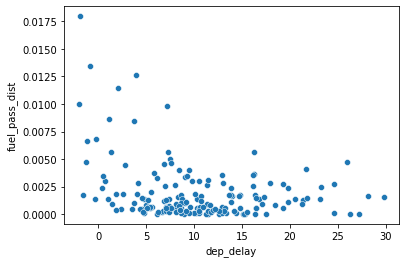

In [566]:
sns.scatterplot(x=final_df_fuel_per_carrier['dep_delay'],y=final_df_fuel_per_carrier['fuel_pass_dist'])

In [567]:
## It looks like the shorter the delay, the more fuel per passenger is being burned. Otherwise, it is pretty consistent. 

In [569]:
flight_df[['origin','origin_city_name','dep_delay']].groupby('origin',as_index=False).mean('dep_delay')

,origin,dep_delay
0,ABE,8.213333
1,ABI,2.565217
2,ABQ,9.323810
3,ABR,-7.750000
4,ABY,0.125000
...,...,...
366,XNA,10.045000
367,XWA,23.000000
368,YAK,-8.916667
369,YKM,-0.363636


In [570]:
flight_df['state/country'] = flight_df['origin_city_name'].map(lambda x: state(x))

In [571]:
delay_per_state = flight_df[['state/country','dep_delay']].groupby('state/country',as_index=False).mean('dep_delay').sort_values('dep_delay',ascending=False)
delay_per_state

,state/country,dep_delay
30,NJ,17.535323
15,KS,16.310345
46,VA,15.697602
20,ME,15.658436
48,VT,14.156863
38,PR,13.708440
51,WV,13.633663
6,CT,13.602067
13,IL,13.547443
1,AL,13.505396


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, 'NJ'),
  Text(1, 0, 'KS'),
  Text(2, 0, 'VA'),
  Text(3, 0, 'ME'),
  Text(4, 0, 'VT'),
  Text(5, 0, 'PR'),
  Text(6, 0, 'WV'),
  Text(7, 0, 'CT'),
  Text(8, 0, 'IL'),
  Text(9, 0, 'AL'),
  Text(10, 0, 'NE'),
  Text(11, 0, 'MA'),
  Text(12, 0, 'CO'),
  Text(13, 0, 'IA'),
  Text(14, 0, 'DC'),
  Text(15, 0, 'TN'),
  Text(16, 0, 'NY'),
  Text(17, 0, 'FL'),
  Text(18, 0, 'SD'),
  Text(19, 0, 'TX'),
  Text(20, 0, 'NC'),
  Text(21, 0, 'LA'),
  Text(22, 0, 'IN'),
  Text(23, 0, 'KY'),
  Text(24, 0, 'OH'),
  Text(25, 0, 'SC'),
  Text(26, 0, 'NV'),
  Text(27, 0, 'MO'),
  Text(28, 0, 'PA'),
  Text(29, 0, 'MD'),
  Text(30, 0, 'AR'),
  Text(31, 0, 'MI'),
  Text(32, 0, 'CA'),
  Text(33, 0, 'GA'),
  Text(34, 0, 'NM'),
  Text(35, 0, 'MN'),
  Text(3

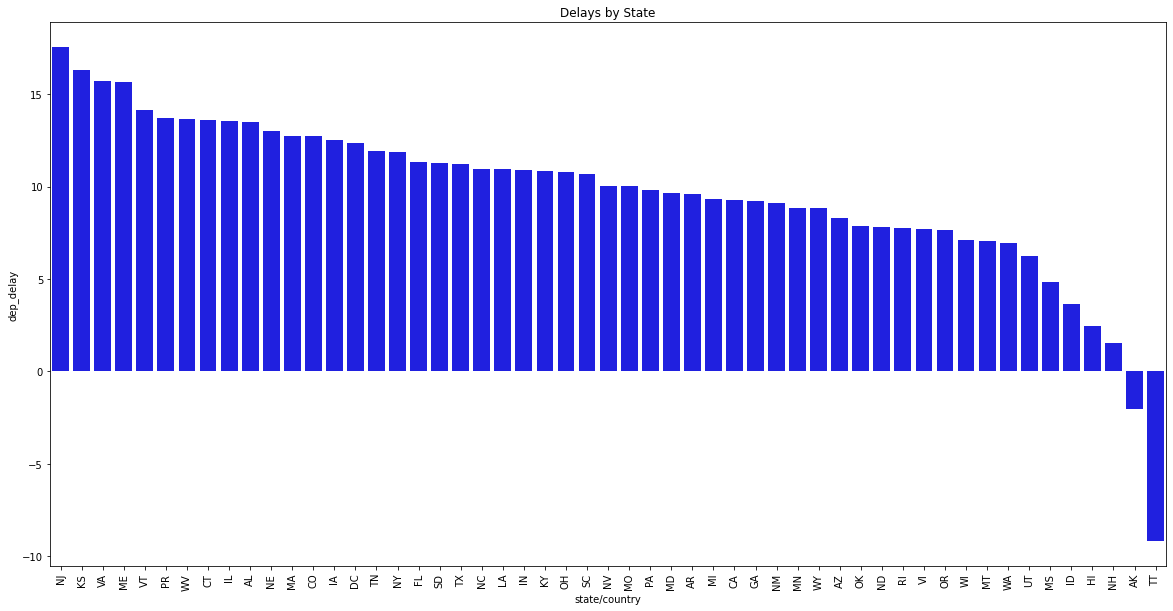

In [572]:
plt.figure(figsize=(20,10))
sns.barplot(x=delay_per_state['state/country'],y=delay_per_state['dep_delay'],color='blue')
plt.title('Delays by State')
plt.xticks(rotation=90)

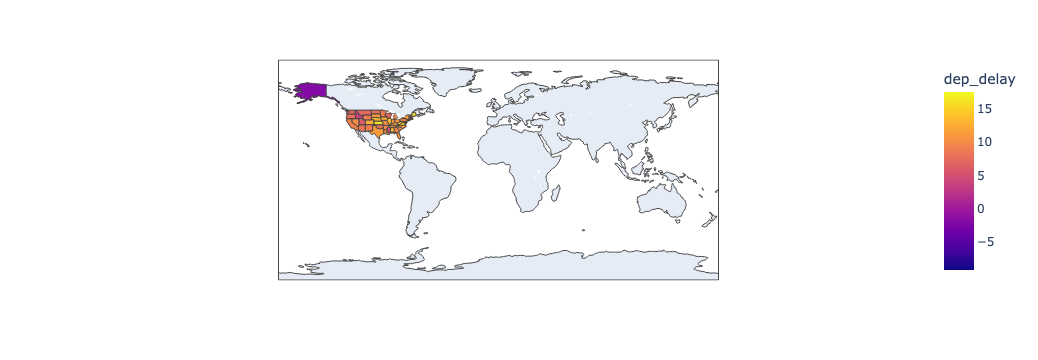

In [573]:
px.choropleth(delay_per_state,
                locations=delay_per_state['state/country'],
                locationmode="USA-states",
                color='dep_delay'
                )

In [579]:
flight_df.reset_index(inplace=True)
flight_df.drop('index',inplace=True,axis=1)

In [580]:
flight_df.to_feather('data/v2_clean_flight')